# Plots to analyse the three Algorithms (uniform sampler, Metropolis algorithm and VEGAS) for the Variational Method applied to the Helium atom
Note that all raw data is in the GitHub repository!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Here we analyse how VEGAS performs with increasing number of iterations, in terms of the energy it gives and the variational parameter

#### Onepara was averaged over N = 50 times. Twopara only for 10 times because of the long runtime. 

The systematic low-energy bias is due to the minimisation algorithm chosen, as it tends to converge upon these values. Note that both curves show this characteristic logarithmic-like shape.

The lower variance over high iteration numbers is expected due to the law of large numbers.

Furthermore, the 2para curve has notably better performance ~10^-2 for all iteration numbers.

In [27]:
#import and unpack data
# vegas
iters, energy, alpha, estd,astd = np.loadtxt('vegas_1param_iter_processed.csv', delimiter=',', skiprows=1, unpack=1)
iters, twop_energy, twop_estd = np.loadtxt('vegas_2param_iter_processed.csv', delimiter=',', skiprows=1, unpack=1)
iters, threep_energy, threep_estd = np.loadtxt('vegas_3param_iter_processed.csv', delimiter=',', skiprows=1, unpack=1)
# metro
iters, m_threep_energy, m_threep_estd = np.loadtxt('metro_threep_processed.csv', delimiter=',', skiprows=1, unpack=1)
iters, m_twop_energy, m_twop_estd = np.loadtxt('metro_twop_processed.csv', delimiter=',', skiprows=1, unpack=1)
iters, m_onep_energy, m_onep_estd = np.loadtxt('metro_onep_processed.csv', delimiter=',', skiprows=1, unpack=1)

# uniform

u_threep_energy, u_threep_estd = np.loadtxt('uniform_test/uni_3p.txt', unpack =1)
u_twop_energy, u_twop_estd = np.loadtxt('uniform_test/uni_2p.txt', unpack =1)
u_onep_energy, u_onep_estd = np.loadtxt('uniform_test/uni_1p.txt', unpack =1)

lit = -2.903724
def pdiff (new, old):
    return (new - old)/ old

print(threep_energy[-1], threep_estd[-1])
print(m_threep_energy[-1], m_threep_estd[-1])
print(u_threep_energy[-1], u_threep_estd[-1])
#(threep_energy[-1] - m_threep_energy[-1]) / m_threep_energy[-1]


#print(pdiff(, energy[-1]))
#print(threep_energy[-1], energy[-1])
#print(threep_estd[-1], estd[-1])




-2.9000628322081634 0.0007065283822486852
-2.892181507931513 0.0010029733340973551
-3.0266213179606822 0.13850820530039312


## VEGAS Plots

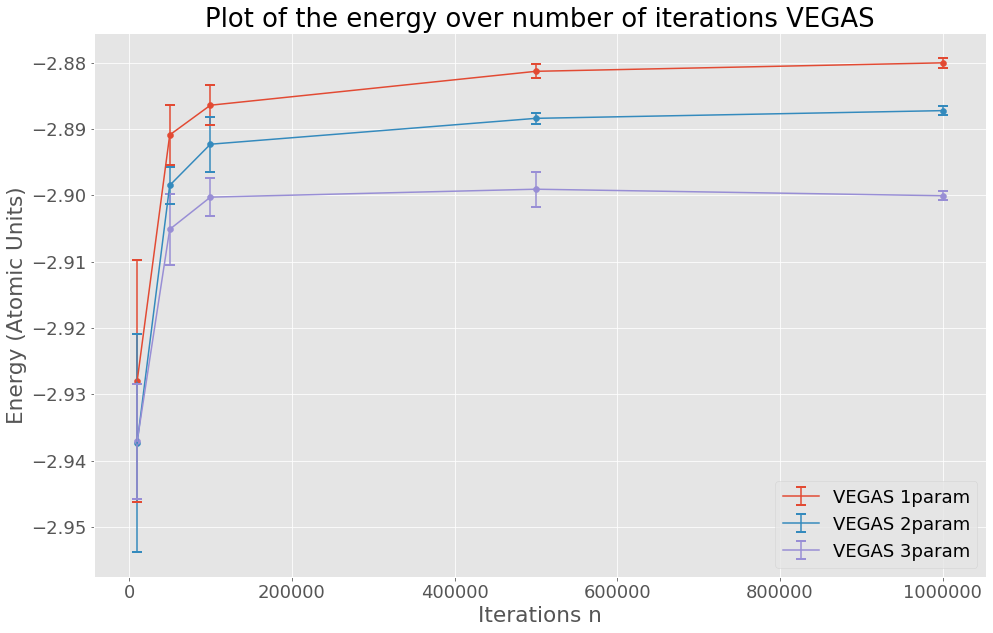

In [3]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5

def get_color(indx):
    return list(plt.rcParams['axes.prop_cycle'])[indx]['color']

plt.xlabel('Iterations n')
plt.ylabel('Energy (Atomic Units)')
color = get_color(0)
plt.errorbar(iters,energy, yerr = estd, mew = mew, capsize=cs, label='VEGAS 1param', color = color)
plt.scatter(iters,energy)

color = get_color(1)
plt.errorbar(iters,twop_energy, yerr = twop_estd, mew = mew, capsize=cs, label='VEGAS 2param', color=color)
plt.scatter(iters,twop_energy)

color = get_color(2)
plt.errorbar(iters,threep_energy, yerr = threep_estd, mew = mew, capsize=cs, label='VEGAS 3param', color=color)
plt.scatter(iters,threep_energy)

plt.legend()

plt.title('Plot of the energy over number of iterations VEGAS')
plt.savefig('vegas_energy_comp')
plt.show()



## Metropolis plot

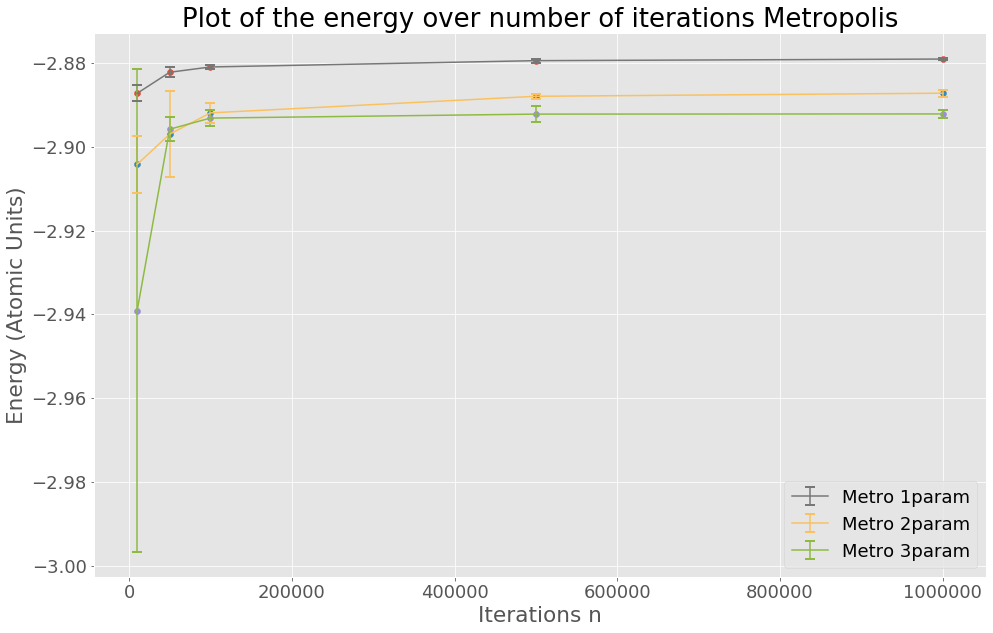

In [22]:
### Plot METRO plots
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5

color = get_color(3)
plt.errorbar(iters,m_onep_energy, yerr = m_onep_estd, mew = mew, capsize=cs, label='Metro 1param', color = color)
plt.scatter(iters,m_onep_energy)

color = get_color(4)
plt.errorbar(iters,m_twop_energy, yerr = m_twop_estd, mew = mew, capsize=cs, label='Metro 2param', color=color)
plt.scatter(iters,m_twop_energy)

color = get_color(5)
plt.errorbar(iters,m_threep_energy, yerr = m_threep_estd, mew = mew, capsize=cs, label='Metro 3param', color=color)
plt.scatter(iters,m_threep_energy)

plt.legend()

plt.xlabel('Iterations n')
plt.ylabel('Energy (Atomic Units)')

plt.title('Plot of the energy over number of iterations Metropolis')
plt.savefig('metro_energy_comp')
plt.show()


In [ ]:
## Uniform plots

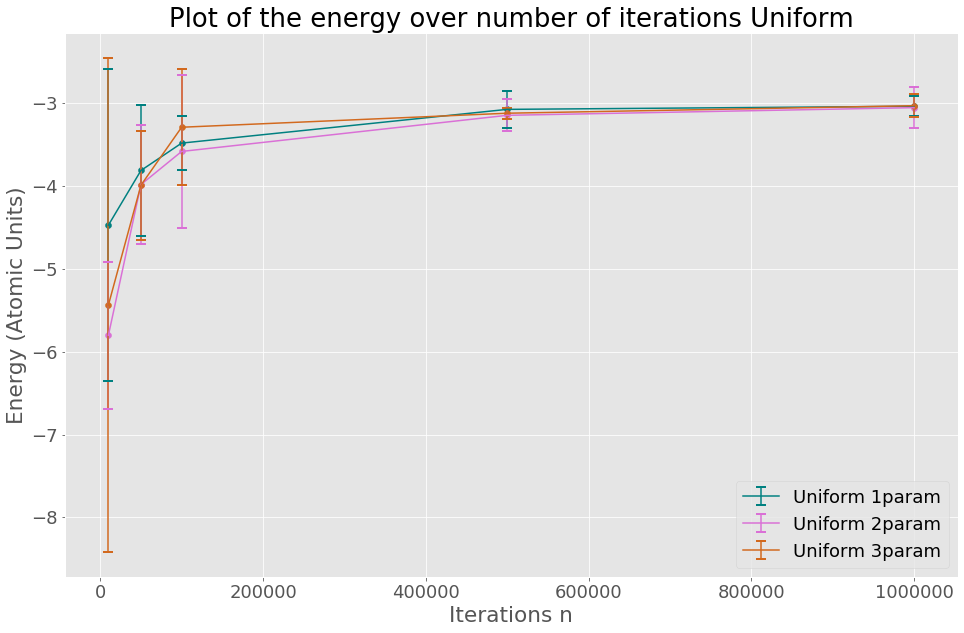

In [23]:
### PLOT UNIFORM PLOTS

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5

plt.errorbar(iters,u_onep_energy, yerr = u_onep_estd, mew = mew, capsize=cs, label='Uniform 1param', color = 'teal')
plt.scatter(iters,u_onep_energy, color = 'teal')

plt.errorbar(iters,u_twop_energy, yerr = u_twop_estd, mew = mew, capsize=cs, label='Uniform 2param', color='orchid')
plt.scatter(iters,u_twop_energy, color='orchid')

plt.errorbar(iters,u_threep_energy, yerr = u_threep_estd, mew = mew, capsize=cs, label='Uniform 3param', color='chocolate')
plt.scatter(iters,u_threep_energy, color='chocolate')

plt.legend()

plt.xlabel('Iterations n')
plt.ylabel('Energy (Atomic Units)')

plt.title('Plot of the energy over number of iterations Uniform')
plt.savefig('uni_energy_comp')
plt.show()


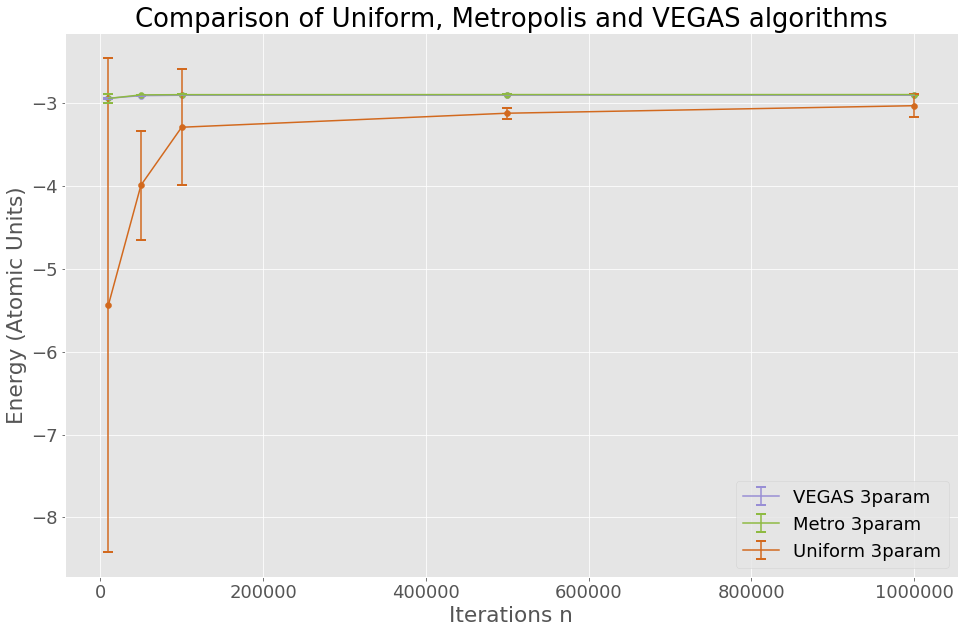

In [26]:
### Plot COMPARISONS
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

color = get_color(2)
plt.errorbar(iters,threep_energy, yerr = threep_estd, mew = mew, capsize=cs, label='VEGAS 3param', color=color)
plt.scatter(iters,threep_energy, color=color)

color = get_color(5)
plt.errorbar(iters,m_threep_energy, yerr = m_threep_estd, mew = mew, capsize=cs, label='Metro 3param', color=color)
plt.scatter(iters,m_threep_energy, color=color)

plt.errorbar(iters,u_threep_energy, yerr = u_threep_estd, mew = mew, capsize=cs, label='Uniform 3param', color='chocolate')
plt.scatter(iters,u_threep_energy, color='chocolate')

plt.xlabel('Iterations n')
plt.ylabel('Energy (Atomic Units)')

plt.legend()
plt.title('Comparison of Uniform, Metropolis and VEGAS algorithms')
#plt.savefig('umv_energy_comp')
plt.show()


# Iteration variance plots

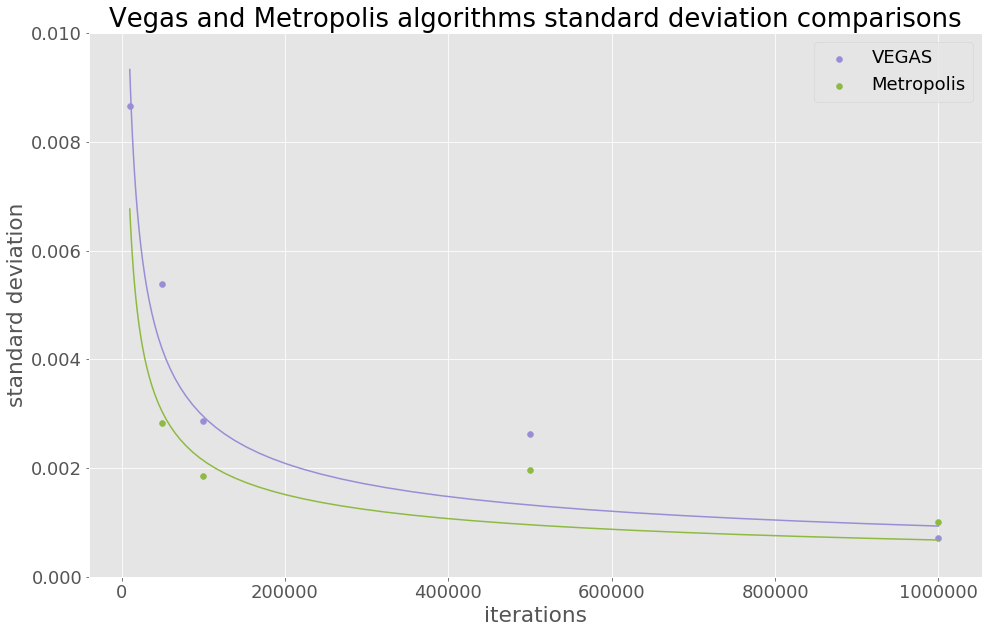

In [6]:
from scipy.optimize import curve_fit

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

def std_fit(n, a):
    return a/np.sqrt(n)

color = get_color(2)
plt.scatter(iters,threep_estd, color=color, label = 'VEGAS')

fitv, covv = curve_fit(std_fit, iters, threep_estd)
logiters = np.logspace(4,6)
plt.plot(logiters, std_fit(logiters, fitv), color=color)


color = get_color(5)
plt.scatter(iters[1:],m_threep_estd[1:], color=color, label = 'Metropolis')
fitm, covm = curve_fit(std_fit, iters[1:], m_threep_estd[1:])
plt.plot(logiters, std_fit(logiters, fitm), color=color)

plt.legend()
plt.title('Vegas and Metropolis algorithms standard deviation comparisons')
plt.ylabel('standard deviation')
plt.xlabel('iterations')
plt.savefig('mv_std_comp')
plt.ylim(0, 0.010)
plt.show()

In [7]:
#plt.style.use('ggplot')
#plt.rcParams.update({'font.size': 18})
#plt.figure(figsize=(16,10))

#mew = 2
#cs = 5
#plt.xlabel('Iterations n')
#plt.ylabel('Variational Parameter alpha')
#plt.errorbar(iters, alpha, yerr = astd, mew =mew, capsize=cs, label='VEGAS 1param')
#plt.legend()

#plt.title('Plot of the variational parameter over number of iterations')
#plt.savefig('1param_alpha_comp')
#plt.show()

### Here we test how the Q value changes for varying number of iterations
#### This was done for N=1e5, 1para, each averaged over 50 trials
The smaller the Q value, the less likely that the integral results are distributed as a Gaussian, which suggests that the number of iterations are insufficient to give a good answer. The variance of the Q value is much greater as N decreases.

In [8]:
iters, qexp, qnorm, qestd, qnstd = np.loadtxt('vegas_q_comparison.csv', delimiter=',', skiprows=1, unpack=1)


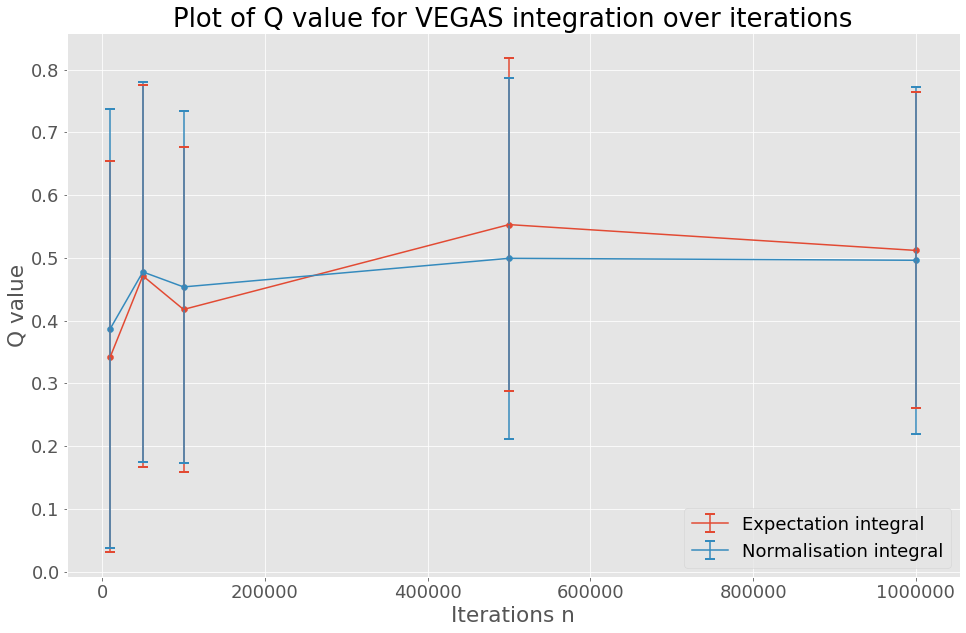

In [9]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

plt.errorbar(iters, qexp, yerr = qestd, mew=mew, capsize=cs, label='Expectation integral')
plt.scatter(iters,qexp)
plt.errorbar(iters, qnorm, yerr = qnstd, mew=mew, capsize=cs, label='Normalisation integral')
plt.scatter(iters,qnorm)
plt.ylabel('Q value')
plt.xlabel('Iterations n')
plt.legend()
plt.title('Plot of Q value for VEGAS integration over iterations')
plt.show()

## This explores how increasing the bound size impacts the value and variance of the energy
#### This was done for N=1e5, 1para, each averaged over 50 trials
The space being integrated over is [-bound,bound] in all 6 dimensions.

We can see a decreasing trend which plateaus quickly, as we integrate over more space. Also note that our program did not allow choosing a smaller bound. We predict that it is due to catastrophic cancellation of the expectation and normalisation integral which our computers cannot handle.

However, the variance increases as the bound increases, as there are less iterations per space.

In [10]:
#import and unpack data
bounds, benergy, balpha, bestd, bastd = np.loadtxt('vegas_bound_comp.csv', delimiter=',', skiprows=1, unpack=1)
bound, prob = np.loadtxt('pdist.csv' ,delimiter = ',', unpack=1)

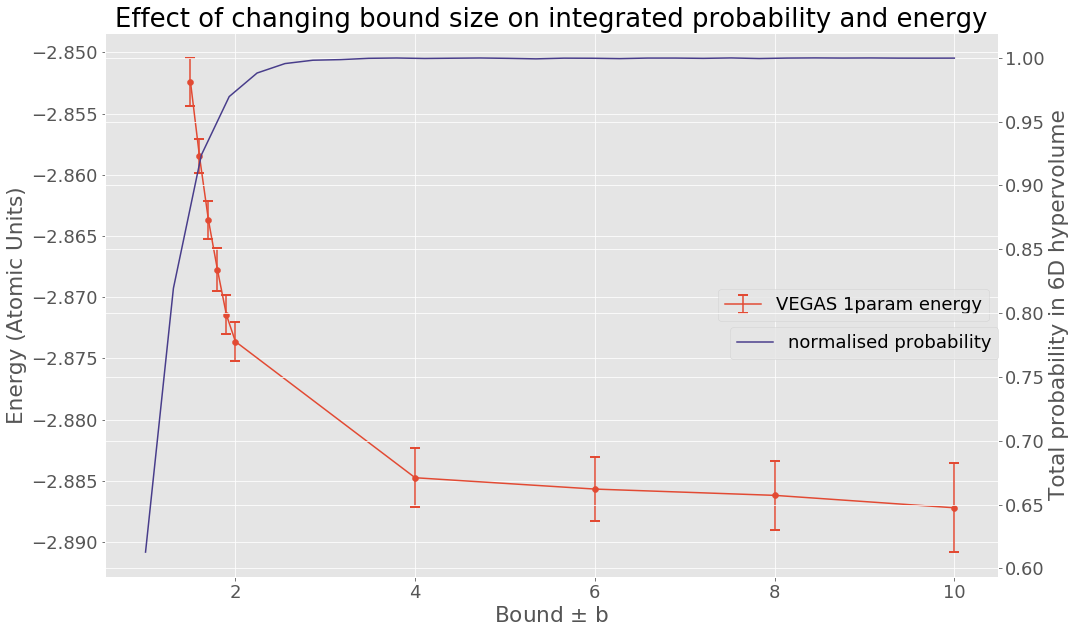

In [11]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(16,10), sharey= 'all')

mew = 2
cs = 5
ax1.set_xlabel('Bound $\pm$ b')
ax1.set_ylabel('Energy (Atomic Units)')
ax1.errorbar(bounds, benergy, yerr = bestd, mew = 2, capsize=cs, label='VEGAS 1param energy')
ax1.scatter(bounds,benergy)
ax1.legend(loc=5)

ax2 = ax1.twinx() 
ax2.plot(bound, prob, color = 'darkslateblue', label = 'normalised probability')
ax2.set_ylabel('Total probability in 6D hypervolume')
ax2.legend(loc=(0.7,0.4))
plt.title('Effect of changing bound size on integrated probability and energy')
plt.savefig('1param_benergy_prob_comp')
plt.show()

Similar with the plot above, there was not significant trend for the variation in optimal alpha. 

In [12]:
#plt.style.use('ggplot')
#plt.rcParams.update({'font.size': 18})
#plt.figure(figsize=(16,10))

#mew = 2
#cs = 5
#plt.xlabel('Iterations n')
#plt.ylabel('Variational Parameter alpha')
#plt.errorbar(bounds, balpha, yerr = bastd, mew =mew, capsize=cs, label='VEGAS 1param')
#plt.legend()

#plt.title('Plot of the variational parameter over number of iterations')
#plt.savefig('1param_alpha_comp')
#plt.show()
